# 2. h√°zi feladat (HF2)

Bead√°si hat√°rid≈ë: okt√≥ber 11. √©jf√©l

Bek√ºld√©s: a Microsoft Teams fel√ºlet√©n kereszt√ºl

Adj sz√∂veges v√°laszt is, ahol a feladatkit≈±z√©s ezt k√©ri!

---

## 1. feladat (HF2/1) (6 pont)

Ebben a feladatban a tavalyi n≈ëi foci vb adatait fogjuk vizsg√°lni az erre k√©sz√ºlt API √©s JSON f√°jlok seg√≠ts√©g√©vel. ‚öΩ

In [334]:
import json
from urllib.request import urlopen
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

**a)** (1 pont)<br>
Adatok bet√∂lt√©se
* A tanult m√≥don t√∂ltsd be az *urllib* √©s *json* csomagok haszn√°lat√°val a vil√°gbajnoks√°g API-ja (http://worldcup.sfg.io/) seg√≠ts√©g√©vel k√©sz√ºlt, a lej√°tszott meccsek adatait tartalmaz√≥ JSON f√°jlt az al√°bbi c√≠mr≈ël: http://worldcup.sfg.io/matches
* A bet√∂lt√©s ut√°n k√©rdezd h√°ny meccset j√°tszottak a vb-n!

In [335]:
vb = json.loads(urlopen('http://worldcup.sfg.io/matches.json').read().decode('utf-8'))
matches_count = len(vb)
matches_count

52

**b)** (1 pont)<br>
√çrasd ki az √∂sszes meccs eredm√©ny√©t az al√°bbi form√°tumban:<br>
orsz√°g1 - orsz√°g2 g√≥l1:g√≥l2 (p√©ld√°ul: England - Panama 6:1)

In [336]:
result_keys = ['home_team_country', 'away_team_country', 'home_team', 'away_team']
results_source = [[result[i] for i in result_keys] for result in vb]
results_source_list = []
for i in results_source:
    elem = []
    for j in range(4):
        if j == 0:
            elem.append(i[0])
        elif j == 1:
            elem.append(i[1])
        elif j == 2:
            elem.append(i[2]['goals'])
        else:
            elem.append(i[3]['goals'])
    results_source_list.append(elem)
results = []
for i in results_source_list:
    results.append(i[0]+' - '+i[1]+'   '+str(i[2])+':'+str(i[3]))
results

['France - Korea Republic   4:0',
 'Germany - China PR   1:0',
 'Spain - South Africa   3:1',
 'Norway - Nigeria   3:0',
 'Brazil - Jamaica   3:0',
 'England - Scotland   2:1',
 'Australia - Italy   1:2',
 'Argentina - Japan   0:0',
 'Canada - Cameroon   1:0',
 'New Zealand - Netherlands   0:1',
 'Chile - Sweden   0:2',
 'USA - Thailand   13:0',
 'Nigeria - Korea Republic   2:0',
 'Germany - Spain   1:0',
 'France - Norway   2:1',
 'Australia - Brazil   3:2',
 'South Africa - China PR   0:1',
 'Japan - Scotland   2:1',
 'Jamaica - Italy   0:5',
 'England - Argentina   1:0',
 'Netherlands - Cameroon   3:1',
 'Canada - New Zealand   2:0',
 'Sweden - Thailand   5:1',
 'USA - Chile   3:0',
 'China PR - Spain   0:0',
 'South Africa - Germany   0:4',
 'Nigeria - France   0:1',
 'Korea Republic - Norway   1:2',
 'Italy - Brazil   0:1',
 'Jamaica - Australia   1:4',
 'Japan - England   0:2',
 'Scotland - Argentina   3:3',
 'Cameroon - New Zealand   2:1',
 'Netherlands - Canada   2:1',
 'Thaila

**c)** (1 pont)<br>
DataFrame k√©sz√≠t√©se
* K√©sz√≠ts az adatokb√≥l egy *pandas* *DataFrame*-et, melynek sorai az egyes meccsek, oszlopai pedig az al√°bbiak: *'fifa_id', 'location', 'datetime', 'home_team_country', 'away_team_country', 'winner', 'home_team_statistics', 'away_team_statistics'*. 
* A *datetime* oszlopot szedd sz√©t k√©t k√ºl√∂n oszlopba, az egyik a meccs napj√°t, a m√°sik pedig a meccs kezdet√©t (√≥ra, perc) tartalmazza.<br>
> Tipp: k√©rd le a *pd.DatetimeIndex* f√ºggv√©nnyel a megfelel≈ë attrib√∫tumot!

In [337]:
tabla_keys = ['fifa_id', 'location', 'datetime', 'home_team_country', 'away_team_country', 'winner', 'home_team_statistics', 'away_team_statistics']
tabla_source = [[result[i] for i in tabla_keys] for result in vb]

tabla = pd.DataFrame(tabla_source)
tabla.columns = tabla_keys

tabla['Dates'] = pd.to_datetime(tabla['datetime']).dt.date
tabla['Time'] = pd.to_datetime(tabla['datetime']).dt.time

tabla_keys = ['fifa_id', 'location', 'Dates', 'Time', 'home_team_country', 'away_team_country', 'winner', 'home_team_statistics', 'away_team_statistics']
pd.DataFrame(tabla, columns = tabla_keys)

fifa_id               location       Dates      Time home_team_country  \
0   300438238       Parc des Princes  2019-06-07  19:00:00            France   
1   300438216           Roazhon Park  2019-06-08  13:00:00           Germany   
2   300438234           Stade Oc√©ane  2019-06-08  16:00:00             Spain   
3   300438213  Stade Auguste-Delaune  2019-06-08  19:00:00            Norway   
4   300438219        Stade des Alpes  2019-06-09  13:30:00            Brazil   
5   300438214          Stade de Nice  2019-06-09  16:00:00           England   
6   300438227       Stade du Hainaut  2019-06-09  23:00:00         Australia   
7   300438217       Parc des Princes  2019-06-10  16:00:00         Argentina   
8   300438218     Stade de la Mosson  2019-06-10  19:00:00            Canada   
9   300438237           Stade Oc√©ane  2019-06-11  13:00:00       New Zealand   
10  300438224           Roazhon Park  2019-06-11  16:00:00             Chile   
11  300438226  Stade Auguste-Delaune  2019-06-11  19:00:00               USA   
12  300438222        Stade des Alpes  2019-06-12  13:00:00           Nigeria   
13  300438243       Stade du Hainaut  2019-06-12  16:00:00           Germany   
14  300438220          Stade de Nice  2019-06-12  19:00:00            France   
15  300438225     Stade de la Mosson  2019-06-13  16:00:00         Australia   
16  300438231       Parc des Princes  2019-06-13  19:00:00      South Africa   
17  300438244           Roazhon Park  2019-06-14  13:00:00             Japan   
18  300438230  Stade Auguste-Delaune  2019-06-14  16:00:00           Jamaica   
19  300438223           Stade Oc√©ane  2019-06-14  19:00:00           England   
20  300438240       Stade du Hainaut  2019-06-15  13:00:00       Netherlands   
21  300438228        Stade des Alpes  2019-06-15  19:00:00            Canada   
22  300438251          Stade de Nice  2019-06-16  13:00:00            Sweden   
23  300438229       Parc des Princes  2019-06-16  16:00:00               USA   
24  300438252           Stade Oc√©ane  2019-06-17  16:00:00          China PR   
25  300438221     Stade de la Mosson  2019-06-17  16:00:00      South Africa   
26  300438255           Roazhon Park  2019-06-17  19:00:00           Nigeria   
27  300438232  Stade Auguste-Delaune  2019-06-17  19:00:00    Korea Republic   
28  300438212       Stade du Hainaut  2019-06-18  19:00:00             Italy   
29  300438242        Stade des Alpes  2019-06-18  19:00:00           Jamaica   
30  300438233          Stade de Nice  2019-06-19  19:00:00             Japan   
31  300438241       Parc des Princes  2019-06-19  19:00:00          Scotland   
32  300438239     Stade de la Mosson  2019-06-20  16:00:00          Cameroon   
33  300438254  Stade Auguste-Delaune  2019-06-20  16:00:00       Netherlands   
34  300438246           Roazhon Park  2019-06-20  19:00:00          Thailand   
35  300438245           Stade Oc√©ane  2019-06-20  19:00:00            Sweden   
36  300438215        Stade des Alpes  2019-06-22  15:30:00           Germany   
37  300438247          Stade de Nice  2019-06-22  19:00:00            Norway   
38  300438249       Stade du Hainaut  2019-06-23  15:30:00           England   
39  300438253           Stade Oc√©ane  2019-06-23  19:00:00            France   
40  300438260  Stade Auguste-Delaune  2019-06-24  16:00:00             Spain   
41  300438236       Parc des Princes  2019-06-24  19:00:00            Sweden   
42  300438258     Stade de la Mosson  2019-06-25  16:00:00             Italy   
43  300438250           Roazhon Park  2019-06-25  19:00:00       Netherlands   
44  300438262           Stade Oc√©ane  2019-06-27  19:00:00            Norway   
45  300438261       Parc des Princes  2019-06-28  19:00:00            France   
46  300438235       Stade du Hainaut  2019-06-29  13:00:00             Italy   
47  300438263           Roazhon Park  2019-06-29  16:30:00           Germany   
48  300438256          Stade de Lyon  2019-07-02  19:00:00           England   

**d)** (1 pont)<br>
Melyik stadionban h√°ny meccset j√°tszottak? √Åbr√°zold az eredm√©nyeket k√∂rdiagramon!

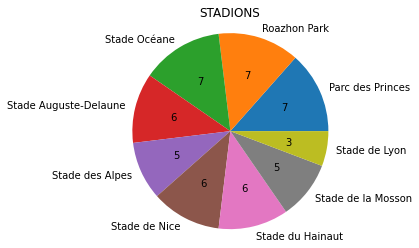

In [338]:
pie_datas = {}
for i in tabla['location']:
    if i not in pie_datas:
        pie_datas[i] = 1
    else:
        pie_datas[i] += 1 

%matplotlib inline
labels = pie_datas.keys()
sizes = []
for i in pie_datas.values():
    sizes.append(i)
total = sum(sizes)    
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct=lambda p:'{:.0f}'.format(p * total / 100))
ax.axis('equal')
ax.set_title('STADIONS')
plt.show()

**e)** (2 pont)<br>
Meccsekre √©s csapatokra vonatkoz√≥an √°br√°zold sz√≥r√°sdiagramon a kapura r√∫g√°sok sz√°m√°t (*attempts*) a labdabirtokl√°s (*possession*) f√ºggv√©ny√©ben, √©s sz√≠nezd a pontokat a passzol√°si hat√©konys√°g (*pass_accuracy*) szerint.<br>
> Tipp: haszn√°ld a *seaborn* csomag [*scatterplot*](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) f√ºggv√©ny√©t!

√ârtelmezd a l√°tottakat, milyen k√∂vetkeztet√©seket tudsz levonni?

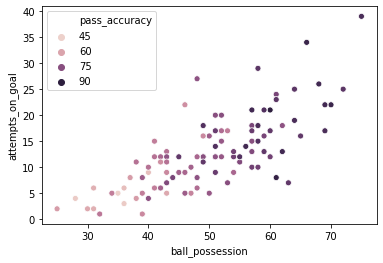

In [339]:
scatter_keys = ['home_team_statistics', 'away_team_statistics']
scatter_source = [[result[i] for i in scatter_keys] for result in vb]
elem_keys = ['country', 'attempts_on_goal', 'ball_possession', 'pass_accuracy']
scatter_source_list = []
for i in scatter_source:
    elem = [[],[]]
    for j in elem_keys:
        for k in i[0].keys():
            if j == k:
                elem[0].append(i[0][k])
        for l in i[1].keys():
            if j == l:
                elem[1].append(i[1][l])
    for m in elem:
        scatter_source_list.append(m)
scatter_source_list_keys = ['country', 'attempts_on_goal', 'ball_possession', 'pass_accuracy']
scatter_datas = pd.DataFrame(scatter_source_list, columns = scatter_source_list_keys)
sns.scatterplot(data=scatter_datas, x="ball_possession", y="attempts_on_goal", hue="pass_accuracy")

A kapura r√∫g√°sok sz√°ma k√∂zel egyenesen ar√°nyosan f√ºgg√∂tt a passzol√°si hat√©konys√°ggal szinte minden csapatn√°l.

---

## 2. feladat (HF2/2) (3 pont)

Jav√≠tsunk az √≥r√°n l√°tott modellen: d√∂nt√©si fa a banki adathalmazon.

In [340]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.tree import export_graphviz

**a)** (1 pont)<br>
Az √≥r√°n a *bank.csv* adathalmaz adatain oszt√°lyoz√°si feladatot oldottunk meg kNN algoritmus seg√≠ts√©g√©vel. Az oszt√°lyoz√≥ nem teljes√≠tett j√≥l. Ism√©teld meg az √≥rai elemz√©st (Notebook02 alapj√°n), de most haszn√°lj d√∂nt√©si f√°t, a maxim√°lis m√©lys√©get √°ll√≠tsd 6-ra!<br>
> Tipp: haszn√°ld a *tree.DecisionTreeClassifier* oszt√°lyoz√≥t!

N√©zz ut√°na, hogyan m≈±k√∂dik a haszn√°lt d√∂nt√©si fa algoritmus!

In [341]:
bank_data = pd.read_csv("../Adatok/bank.csv", delimiter = " ", names = ['age', 'sex', 'region', 'income', 'married', 'children', 'car','save_acct', 'current_acct', 'mortgage', 'pep'])
numeric_data = bank_data.replace(['NO', 'YES', 'MALE', 'FEMALE'],[0,1,0,1])
numeric_data.head()
numeric_data = numeric_data.values

features = np.zeros((len(numeric_data),4))
numeric_data = np.append(numeric_data,features,1)
j = 2
for i in range(len(numeric_data)):
    if numeric_data[i][j] == 'INNER_CITY':
        numeric_data[i][11:15] = [1,0,0,0]
    if numeric_data[i][j] == 'TOWN':
         numeric_data[i][11:15] = [0,1,0,0]
    if numeric_data[i][j] == 'RURAL':
         numeric_data[i][11:15] = [0,0,1,0]
    if numeric_data[i][j] == 'SUBURBAN':
         numeric_data[i][11:15] = [0,0,0,1]        
numeric_data = np.delete(numeric_data, 2, 1)
numeric_data.astype(float)

bank_labels = numeric_data[:, 9].astype(int)
bank_attrs  = np.delete(numeric_data, 9, 1)

In [342]:
bank_features_train, bank_features_test, bank_labels_train, bank_labels_test = train_test_split(bank_attrs, bank_labels, test_size=0.33, random_state=42)

#TEACHING
clf = DecisionTreeClassifier(max_depth=6)
clf = clf.fit(bank_features_train, bank_labels_train)

#PREDICTION
predictions_test = clf.predict(bank_features_test)

#CONFUSION
cm = metrics.confusion_matrix(bank_labels_test, predictions_test)
print(cm)

#PRECISION, RECALL, ACCURACY
print("Precision: ", metrics.precision_score(bank_labels_test, predictions_test))
print("Recall: ", metrics.recall_score(bank_labels_test, predictions_test))
print("Accuracy: ", metrics.accuracy_score(bank_labels_test, predictions_test))

[[87 11]
 [16 84]]
Precision:  0.8842105263157894
Recall:  0.84
Accuracy:  0.8636363636363636


**b)** (1 pont)<br>
Most pr√≥b√°ld ki m√°s param√©terbe√°ll√≠t√°sokkal tan√≠tani a f√°t! Rajzoltasd ki az el≈ëz≈ë feladatr√©szben √©s a most tan√≠tott d√∂nt√©si fa ROC g√∂rb√©j√©t ugyanazon az √°br√°n (m√°s sz√≠nnel), az √°br√°n az *y=x* egyenest is rajzold be! Hogyan teljes√≠t a d√∂nt√©si fa?

In [343]:
bank_features_train2, bank_features_test2, bank_labels_train2, bank_labels_test2 = train_test_split(bank_attrs, bank_labels, test_size=0.25, random_state=13)

#TEACHING
clf2 = DecisionTreeClassifier(max_depth=4)
clf2 = clf2.fit(bank_features_train2, bank_labels_train2)

#PREDICTION
predictions_test2 = clf2.predict(bank_features_test2)

#CONFUSION
cm2 = metrics.confusion_matrix(bank_labels_test2, predictions_test2)
print(cm2)

#PRECISION, RECALL, ACCURACY
print("Precision: ", metrics.precision_score(bank_labels_test2, predictions_test2))
print("Recall: ", metrics.recall_score(bank_labels_test2, predictions_test2))
print("Accuracy: ", metrics.accuracy_score(bank_labels_test2, predictions_test2))

[[70 10]
 [14 56]]
Precision:  0.8484848484848485
Recall:  0.8
Accuracy:  0.84


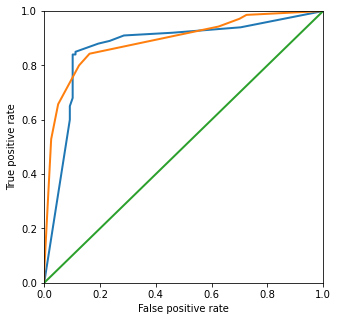

In [344]:
tree_prob = clf.predict_proba(bank_features_test)
fpr, tpr, thresholds = metrics.roc_curve(bank_labels_test, tree_prob[:,1], pos_label=1, sample_weight=None)

tree_prob2 = clf2.predict_proba(bank_features_test2)
fpr2, tpr2, thresholds2 = metrics.roc_curve(bank_labels_test2, tree_prob2[:,1], pos_label=1, sample_weight=None)

x = [0, 1]
y = [0, 1]

%matplotlib inline
plt.figure(figsize=(5,5))

plt.plot(fpr, tpr, linewidth=2.0)
plt.plot(fpr2, tpr2, linewidth=2.0)
plt.plot(x, y, linewidth=2.0)


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim([0,1])
plt.ylim([0,1])

plt.show()

In [345]:
print("2.a r√©sz: ", metrics.roc_auc_score(bank_labels_test,tree_prob[:,1], average='macro', sample_weight=None))
print("2.b r√©sz: ", metrics.roc_auc_score(bank_labels_test2,tree_prob2[:,1], average='macro', sample_weight=None))

2.a r√©sz:  0.8690816326530613
2.b r√©sz:  0.8896428571428572


Mindkett≈ë feladatr√©szben j√≥l teljes√≠t a d√∂nt√©si fa.

**c)** (1 pont)<br>
A d√∂nt√©si fa kirajzol√°sa √©s √©rtelmez√©se
* Az a) feladatr√©szben betan√≠tott d√∂nt√©si f√°t vizualiz√°ld a *tree.export_graphviz* f√ºggv√©ny seg√≠ts√©g√©vel. A fa megjelen√≠t√©s√©hez haszn√°ld a *tree.plot_tree* f√ºggv√©nyt!

* Mi szerint v√°g el≈ësz√∂r a fa? Mik a gyakori v√°g√≥attrib√∫tumok? Egy-k√©t mondatban √©rtelmezd a l√°tottakat!

In [346]:
print(tree.export_graphviz(clf))

digraph Tree {
node [shape=box] ;
0 [label="X[2] <= 50051.701\ngini = 0.491\nsamples = 402\nvalue = [228, 174]"] ;
1 [label="X[4] <= 1.5\ngini = 0.477\nsamples = 369\nvalue = [224, 145]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[4] <= 0.5\ngini = 0.498\nsamples = 246\nvalue = [131, 115]"] ;
1 -> 2 ;
3 [label="X[3] <= 0.5\ngini = 0.432\nsamples = 168\nvalue = [115, 53]"] ;
2 -> 3 ;
4 [label="X[8] <= 0.5\ngini = 0.467\nsamples = 43\nvalue = [16, 27]"] ;
3 -> 4 ;
5 [label="X[0] <= 36.5\ngini = 0.142\nsamples = 26\nvalue = [2, 24]"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 12\nvalue = [0, 12]"] ;
5 -> 6 ;
7 [label="gini = 0.245\nsamples = 14\nvalue = [2, 12]"] ;
5 -> 7 ;
8 [label="X[6] <= 0.5\ngini = 0.291\nsamples = 17\nvalue = [14, 3]"] ;
4 -> 8 ;
9 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
8 -> 9 ;
10 [label="gini = 0.0\nsamples = 14\nvalue = [14, 0]"] ;
8 -> 10 ;
11 [label="X[6] <= 0.5\ngini = 0.329\nsamples = 125\nvalue = [99, 26]"] ;
3 -

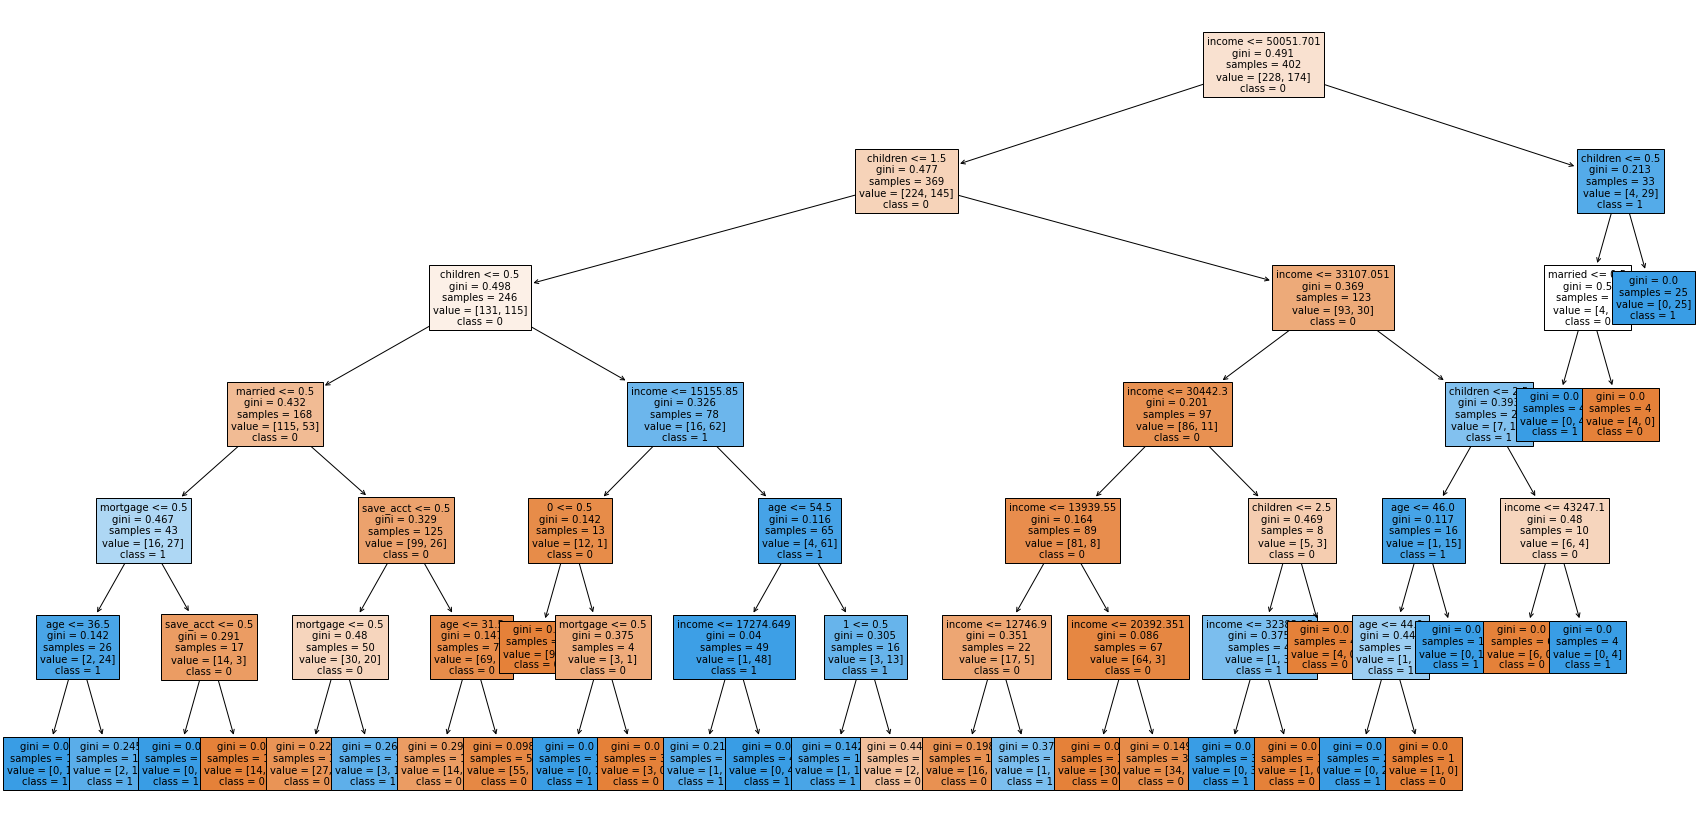

In [347]:
feature_cols = ['age', 'sex', 'income', 'married', 'children', 'car','save_acct', 'current_acct', 'mortgage', 'pep', '0','1','0','1']
fig = plt.figure(figsize=(30,15))
tree.plot_tree(clf, feature_names=feature_cols, class_names=['0','1'], filled=True, fontsize = 10)
plt.show()

A fa el≈ësz√∂r az income alapj√°n v√°g. A gyakori v√°g√≥attrib√∫tumok az income, a children, a married, a save_acct √©s az age, ezek k√∂z√ºl is a leggyakoribb az income.

---

## 3. feladat (HF2/3) (6 pont)

Borban az igazs√°g? Ebben a feladatban k√ºl√∂nb√∂z≈ë borok min≈ës√©g√©t kell predikt√°lnunk! Meg tudja j√≥solni egy bor√°sz puszt√°n a bor k√©miai tulajdons√°gai alapj√°n, hogy a bor√°t min≈ës√©gi bornak fogja-e tartani a szakma? üç∑

In [348]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

**a)** (1 pont)<br>
A [UCI adatt√°rh√°zban](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) tal√°lhat√≥ adatok alapj√°n fogunk vizsg√°l√≥dni. Ez t√∂bb ezer √©szak-portug√°liai bor 11 k√©miai tulajdons√°g√°t (pl. cukortartalom, pH, alkoholtartalom, stb.) √©s egy a borokra vonatkoz√≥ 10-es sk√°l√°n m√©rt min≈ës√©gi mutat√≥t tartalmaz.

* T√∂ltsd be a **v√∂r√∂s**borok adatait egy pandas dataframe-be [az adatt√°rh√°zb√≥l](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/). Az adatot k√∂zvetlen√ºl az internetr≈ël, a f√°jl saj√°t g√©pre val√≥ let√∂lt√©se n√©lk√ºl t√∂ltsd be! A *quality* oszlop lesz a c√©lv√°ltoz√≥ (label), a t√∂bbi oszlop pedig magyar√°z√≥v√°ltoz√≥ (feature).
* Bin√°ris oszt√°lyoz√°si feladatk√©nt tekint√ºnk a tov√°bbiakban a probl√©m√°ra, ez√©rt a c√©lv√°ltoz√≥ √©rt√©k√©t defini√°ld √°t: legyen az √©rt√©ke 0, ha *quality $<$ 6.5* (rossz borok), √©s legyen az √©rt√©ke 1, ha *quality $\geq$ 6.5* (j√≥ borok). Hozz l√©tre k√ºl√∂n *numpy array*-ket a c√©lv√°ltoz√≥k √©s a t√∂bbi attrib√∫tum t√°rol√°s√°ra!

In [349]:
redwine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';', quotechar='.', header = 0)
redwine_num_data = redwine_data.values

for i in range(len(redwine_num_data)):
    if redwine_num_data[i][11] < 6.5:
        redwine_num_data[i][11] = 0
    else:
        redwine_num_data[i][11] = 1

redwine_num_data.astype(float)
redwine_labels = redwine_num_data[:, 11].astype(int)
redwine_features = np.delete(redwine_num_data, 11, 1)

**b)** (2 pont)<br>
Oszt√°lyoz√°s, keresztvalid√°l√°s
* Haszn√°lj *k*NN algoritmust az oszt√°lyoz√°sra! T√≠zszeres keresztvalid√°ci√≥val √°llap√≠tsd meg, hogy milyen *k* √©rt√©k eset√©n lesz optim√°lis az oszt√°lyoz√°s F-m√©rt√©ke! Vizsg√°ld a *k* √©rt√©k√©t egy √©rtelmes intervallumon!<br>
> Tipp: haszn√°ld a *model_selection.cross_val_score* f√ºggv√©nyt *scoring = 'f1'* be√°ll√≠t√°ssal!

* √Åbr√°zold *k* f√ºggv√©ny√©ben a keresztvalid√°ci√≥s technik√°val kapott F-m√©rt√©kek boxplotj√°t!<br>
> Tipp: haszn√°ld a *seaborn* csomag *boxplot* f√ºggv√©ny√©t!

In [350]:
k = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]
F = []
for i in k:
    kNC = KNeighborsClassifier(n_neighbors = i, metric = "euclidean")
    f = cross_val_score(kNC, redwine_features, redwine_labels, cv=10, scoring='f1')
    F.append(f)

In [351]:
F_mean = []
for j in F:
    F_mean.append(j.mean())
index = F_mean.index(max(F_mean))
print(k[index])

1


A k=1 √©rt√©k eset√©n lesz optim√°lis az oszt√°lyoz√°s F-m√©rt√©ke.

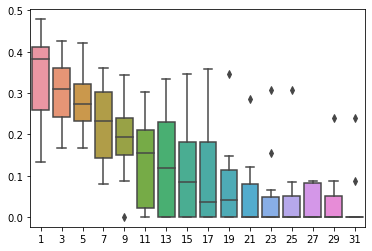

In [352]:
ax = sns.boxplot(x = k, y = F)

**c)** (2 pont)<br>
Haszn√°lj d√∂nt√©si f√°t az oszt√°lyoz√°sra! V√©gezd el az el≈ëz≈ë feladatr√©szben le√≠rt elemz√©st, most a vizsg√°lt param√©ternek a d√∂nt√©si fa maxim√°lis m√©lys√©g√©t v√°laszd!

In [353]:
d = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Fa = []
for i in d:
    DTC = DecisionTreeClassifier(max_depth=i)
    f = cross_val_score(DTC, redwine_features, redwine_labels, cv=10, scoring='f1')
    Fa.append(f)

In [354]:
Fa_mean = []
for j in Fa:
    Fa_mean.append(j.mean())
index = Fa_mean.index(max(Fa_mean))
print(d[index])

4


A max_depth=4 √©rt√©k eset√©n lesz optim√°lis az oszt√°lyoz√°s F-m√©rt√©ke.

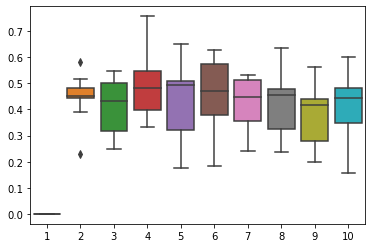

In [355]:
ax = sns.boxplot(x = d, y = Fa)

**d)** (1 pont)<br>
Mit tapasztalt√°l az elemz√©s sor√°n? Hogyan teljes√≠tenek az oszt√°lyoz√≥k? Melyiket haszn√°ln√°d?

In [356]:
kredwine_features_train, kredwine_features_test, kredwine_labels_train, kredwine_labels_test = train_test_split(redwine_attrs, redwine_labels, test_size=0.33, random_state=42)

kkNC = KNeighborsClassifier(n_neighbors = 1, metric = "euclidean")
kkNC = kkNC.fit(redwine_features_train, redwine_labels_train)

kkNC_prob = kkNC.predict_proba(kredwine_features_test)
print(metrics.roc_auc_score(kredwine_labels_test,kkNC_prob[:,1], average='macro', sample_weight=None))

0.7166613873930947


In [357]:
fredwine_features_train, fredwine_features_test, fredwine_labels_train, fredwine_labels_test = train_test_split(redwine_attrs, redwine_labels, test_size=0.33, random_state=42)

fDTC = DecisionTreeClassifier(max_depth=4)
fDTC = fDTC.fit(fredwine_features_train, fredwine_labels_train)

fDTC_prob = fDTC.predict_proba(fredwine_features_test)
print(metrics.roc_auc_score(fredwine_labels_test,fDTC_prob[:,1], average='macro', sample_weight=None))

0.7820139948743052


A b √©s c feladatr√©szben l√°tottak √©s a fentebb elv√©gzett optim√°lis √©rt√©kekkel val√≥ tesztel√©s sor√°n l√°that√≥, hogy mind a k√©t oszt√°lyoz√≥ eg√©sz j√≥l teljes√≠tett. √ân a d√∂nt√©si f√°sat v√°lasztan√°m, mert az valamennyivel jobban teljes√≠tett.

---